## Cardiff NLP Hackathon 2025 - Starter Code

Welcome to Cardiff NLP's second hackathon! Below is some code to get started on the AMPLYFI API and look at some data.

====================

Note: the API is a real time resource so extra points to projects that can treat it as a continual data stream rather than a one-off data source!

Another thing to note about this is that it will affect Amplyfi's servers if you download a silly amount of data. We ask that you only request 100 results per request, but if you have the data you need, try to download it or store it as a variable rather than requesting the exact same data over and over again.

In [1]:
! pip install -q pyngrok==6.0.0 streamlit

In [2]:
%%writefile app.py
import streamlit as st
import io
import logging

logging.basicConfig(
    filename='app.log',  # Specify the log file name
    filemode='a',        # 'a' for append (default), 'w' for overwrite each run
    level=logging.DEBUG, # Set a lower level for file logs, typically DEBUG
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

# Set up streamlit page
st.set_page_config(
    page_title="Chat app skeleton.",
    layout="centered",
)

st.title("Chat app skeleton.")
st.markdown("""
    <style>
        .st-emotion-cache-4oy321 {
            text-align: left;
            margin: 10px;
            margin-right: 50px;
            background-color: salmon;
        }
        .st-emotion-cache-janbn0 {
            text-align: right;
            margin: 10px;
            margin-left: 50px;
            background-color: none;

        }
        .st-emotion-cache-jmw8un {
          display: none;
        }
        .st-emotion-cache-4zpzjl {
          display: none;
        }
    </style>
""", unsafe_allow_html=True)

Writing app.py


In [14]:
# Import some libraries

import requests
import json
import nltk
import re
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Amplyfi have provided some limits and explanations of what you can query the API for below:

`query_text` anything

`result_size` <=100

`include_highlights` boolean (if True, you get sentences matching keyphrases in the query)

`include_smart_tags` boolean (if True, you get back metadata from our "smart" market intel classifiers - signals and industries)

`ai_answer` can only accept "basic", this will take the 5 most relevant docs and answer the query_text based on them




In [20]:
# API endpoint from the newly deployed service

API_URL = "https://zfgp45ih7i.execute-api.eu-west-1.amazonaws.com/sandbox/api/search"
API_KEY = "XYZ38746G38B7RB46GBER"

headers = {
    "Content-Type": "application/json",
    "x-api-key": API_KEY
}

# Edit the below to get different data
payload = {
  "query_text": "what is greta thunberg doing",
  "result_size": 90,
}

response = requests.post(API_URL, headers=headers, data=json.dumps(payload))
json_response = response.json()

json_response


{'results': [{'id': 'DL-0fb7ba2104d01cba4e3a09be4fe28814',
   'title': 'Who is Greta Thunberg, the activist who tried to bring aid to Palestine',
   'url': 'https://www.sdpnoticias.com/internacional/quien-es-greta-thunberg-la-activista-intento-llevar-ayuda-a-palestina/',
   'summary': 'Greta Thunberg is a Swedish-born activist who tried to bring aid to Palestine. She and her boat heading for the Gaza Strip to carry humanitarian aid were intercepted in international waters. We tell you the following details about the activist who failed to do so due to the intervention of the Israeli authorities.',
   'score': 5.853409,
   'timestamp': '2025-06-10T03:32:03'},
  {'id': 'DL-f54a32908b9d740d8b45238fd86c0a1f',
   'title': 'Israel intercepted a boat carrying Greta Thunberg and a Brazilian.',
   'url': 'https://www.opovo.com.br/noticias/mundo/2025/06/10/israel-intercepta-barco-que-levava-greta-thunberg-e-brasileiro.html',
   'summary': 'Israeli soldiers intercepted and seized control of a hum

In [23]:
json_response['results'][3]

{'id': 'DL-f770e003c235ff7f6517158cd3e5b337',
 'title': 'The Committee is concerned that the State party has not ratified the Optional Protocol to the Convention on the Rights of the Child on the sale of children, child prostitution and child pornography.',
 'url': 'https://canaln.pe/internacionales/greta-thunberg-zarpa-rumbo-gaza-romper-bloqueo-israeli-n483976',
 'summary': 'Climate activist Greta Thunberg embarks on a new politically charged mission to the Gaza Strip. She is part of the Freedom Flotilla Coalition, an organization that promotes direct action to denounce the Israeli blockade. The images of the group waving a Palestinian flag have circulated widely on social networks.',
 'score': 2.2458076,
 'timestamp': '2025-06-03T21:48:31'}

In [29]:
df = pd.json_normalize(json_response['results'])

df.head()

,id,title,url,summary,score,timestamp
0,DL-0fb7ba2104d01cba4e3a09be4fe28814,"Who is Greta Thunberg, the activist who tried ...",https://www.sdpnoticias.com/internacional/quie...,Greta Thunberg is a Swedish-born activist who ...,5.853409,2025-06-10T03:32:03
1,DL-f54a32908b9d740d8b45238fd86c0a1f,Israel intercepted a boat carrying Greta Thunb...,https://www.opovo.com.br/noticias/mundo/2025/0...,Israeli soldiers intercepted and seized contro...,3.183594,2025-06-10T00:03:10
2,DL-e603fbb3efb9160196e61534de0a7b38,Top 10 world news: Israel warns Greta Thunberg...,https://www.wionews.com/world/top-10-world-new...,Israel’s defence minister Israel Katz said the...,2.462463,2025-06-08T00:00:00
3,DL-f770e003c235ff7f6517158cd3e5b337,The Committee is concerned that the State part...,https://canaln.pe/internacionales/greta-thunbe...,Climate activist Greta Thunberg embarks on a n...,2.245808,2025-06-03T21:48:31
4,DL-15a444466fba859818df40806fc6a505,Israel's threat to remind of the Blue Marmara,https://www.sozcu.com.tr/israil-den-mavi-marma...,Israel will not allow any attempts to breach t...,1.802799,2025-06-08T18:50:58


In [62]:
print(df['timestamp'])

0   2025-06-04 16:07:07+00:00
1   2025-06-07 16:39:00+00:00
2   2025-06-07 18:27:36+00:00
3   2025-06-07 19:23:00+00:00
4   2025-06-08 05:03:23+00:00
5   2025-06-09 09:25:11+00:00
6   2025-06-09 09:37:00+00:00
7   2025-06-09 17:22:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]


## Example Sentiment Analysis

In [63]:
## Clean data

def clean_text(text):
    """
    - Convert to lowercase
    - Remove URLs
    - Remove punctuation / non-alpha
    - Collapse multiple spaces
    """
    if not isinstance(text, str):
        return ""
    # Remove URLs (very basic)
    text = re.sub(r"http\S+|www\.\S+", "", text)
    # Lowercase
    text = text.lower()
    # Keep only letters and spaces
    text = re.sub(r"[^a-z\s]", " ", text)
    # Collapse multiple spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['clean_summary'] = df['summary'].apply(clean_text)


In [64]:
## Sentiment analysis example

sia = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    """
    Returns a dict with these keys:
       - neg: negative sentiment score
       - neu: neutral score
       - pos: positive score
       - compound: normalized, weighted composite (-1 to +1)
    """
    return sia.polarity_scores(text)

# Apply to each summary
df['sentiment'] = df['clean_summary'].apply(get_sentiment_scores)

# Split into separate columns if you like
df['sent_neg'] = df['sentiment'].apply(lambda d: d['neg'])
df['sent_neu'] = df['sentiment'].apply(lambda d: d['neu'])
df['sent_pos'] = df['sentiment'].apply(lambda d: d['pos'])
df['sent_compound'] = df['sentiment'].apply(lambda d: d['compound'])

# Quick look at top 5 compound scores
print(df[['clean_summary', 'sent_compound', 'timestamp']].sort_values(by='sent_compound', ascending=False).head())
print(df[['clean_summary', 'sent_compound', 'timestamp']].sort_values(by='sent_compound').head())


                                       clean_summary  sent_compound  \
7  climate activist greta thunberg praises cole e...         0.9844   
4  in an essay pierre jos billotte explores the t...         0.8402   
1  european lawmakers are calling for safe passag...         0.7964   
3  the madleen gaza flotilla which sailed from si...         0.4576   
0  the madleen is seeking to rally the besieged t...         0.4445   

                  timestamp  
7 2025-06-09 17:22:08+00:00  
4 2025-06-08 05:03:23+00:00  
1 2025-06-07 16:39:00+00:00  
3 2025-06-07 19:23:00+00:00  
0 2025-06-04 16:07:07+00:00  
                                       clean_summary  sent_compound  \
5  iran says its nuclear programme is only for pe...        -0.5245   
6  israel called the madleen a selfie jet and sai...        -0.4215   
2  madleen loaded with rice and medicines is en r...        -0.3400   
0  the madleen is seeking to rally the besieged t...         0.4445   
3  the madleen gaza flotilla which sai

In [32]:
# Find index of the most positive (max compound) and most negative (min compound) summaries
max_idx = df['sent_compound'].idxmax()
min_idx = df['sent_compound'].idxmin()

# Retrieve the scores
max_score = df.loc[max_idx, 'sent_compound']
min_score = df.loc[min_idx, 'sent_compound']

# Print the full clean summaries along with their sentiment scores
print("Most positive summary (compound = {:.3f}):\n".format(max_score))
print(df.loc[max_idx, 'clean_summary'])


print("\n\nMost negative summary (compound = {:.3f}):\n".format(min_score))
print(df.loc[min_idx, 'clean_summary'])

Most positive summary (compound = 0.984):

climate activist greta thunberg praises cole escola s win at the tony awards she praises the interconnectedness of environmental and social issues and the significance of amplifying bold voices in movements for justice escola made history this year by winning best actor in a play for oh mary


Most negative summary (compound = -0.758):

israel took control of the ship and detained human rights defenders on board israel s foreign ministry announced on social media platform x formerly twitter that the ship will be steered to israel from where the passengers are expected to return to their home countries and the aid material including baby food medicines and essentials it confiscated would be transferred to gaza through humanitarian channels there have been repeated instances of shootings of desperate and starving palestinians who come to the aid distribution centres run by gaza human


***My code:***

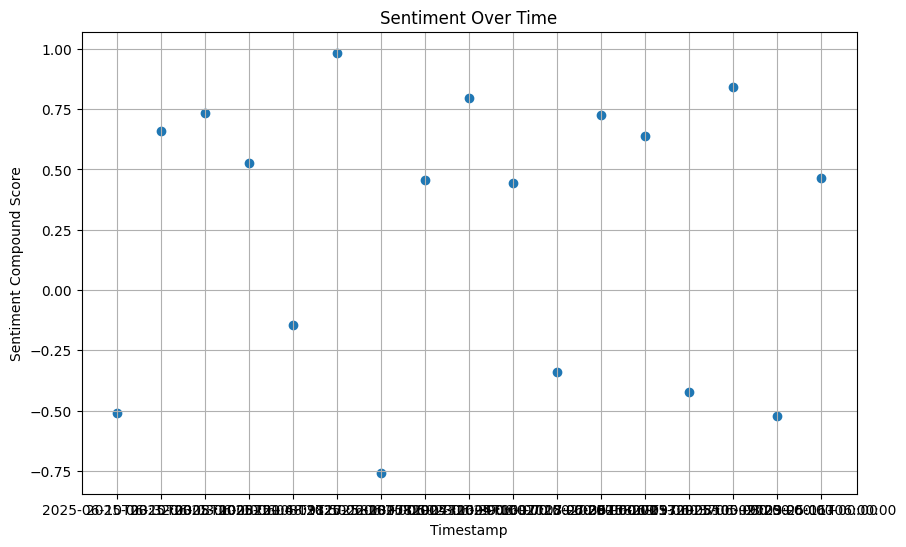

In [49]:
import matplotlib.pyplot as plt

# Create a scatter plot of timestamp vs sentiment compound score
plt.figure(figsize=(10, 6)) # Set the figure size
plt.scatter(df['timestamp'], df['sent_compound'])
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Compound Score')
plt.title('Sentiment Over Time')
plt.grid(True)
plt.show()

In [61]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported

# Assuming 'df' is your DataFrame containing 'timestamp' and 'sent_compound'

# Convert timestamp to datetime with error handling
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%dT%H:%M:%S%z', errors='coerce')

# Drop rows where the timestamp conversion failed (resulted in NaT)
df.dropna(subset=['timestamp'], inplace=True)

# Sort by timestamp to ensure slider works correctly
df = df.sort_values(by='timestamp').reset_index(drop=True)

# ... rest of your code for update_plot and slider


def update_plot(index):
    """Updates the plot to highlight the data point at the given index."""
    plt.figure(figsize=(10, 6))
    plt.scatter(df['timestamp'], df['sent_compound'], label='All Results') # Plot all points
    if 0 <= index < len(df):
        plt.scatter(df['timestamp'].iloc[index], df['sent_compound'].iloc[index], color='red', label='Selected Result') # Highlight selected point
        plt.title(f"Sentiment Over Time (Selected: {df['timestamp'].iloc[index].strftime('%Y-%m-%d %H:%M:%S')})")
    else:
        plt.title("Sentiment Over Time")

    plt.xlabel('Timestamp')
    plt.ylabel('Sentiment Compound Score')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create a slider widget based on the DataFrame index
timestamp_slider = widgets.IntSlider(
    min=0,
    max=len(df) - 1,
    step=1,
    description='Result Index:',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Use interactive to link the slider to the update_plot function
widgets.interactive(update_plot, index=timestamp_slider)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Result Index:', max=7), Output(…

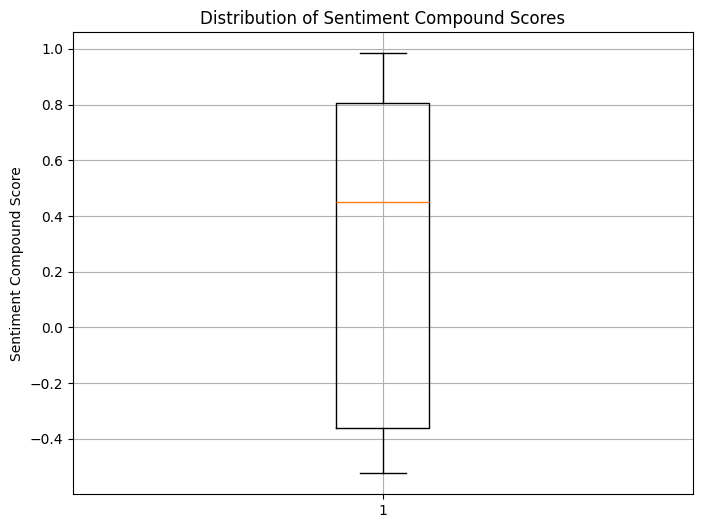

In [65]:
import matplotlib.pyplot as plt

# Create a box plot of the 'sent_compound' column
plt.figure(figsize=(8, 6)) # Set the figure size
plt.boxplot(df['sent_compound'])
plt.ylabel('Sentiment Compound Score')
plt.title('Distribution of Sentiment Compound Scores')
plt.grid(True)
plt.show()

<ipython-input-69-7e93c9d1de9a>:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, patch_artist=True) # Use patch_artist for colored boxes


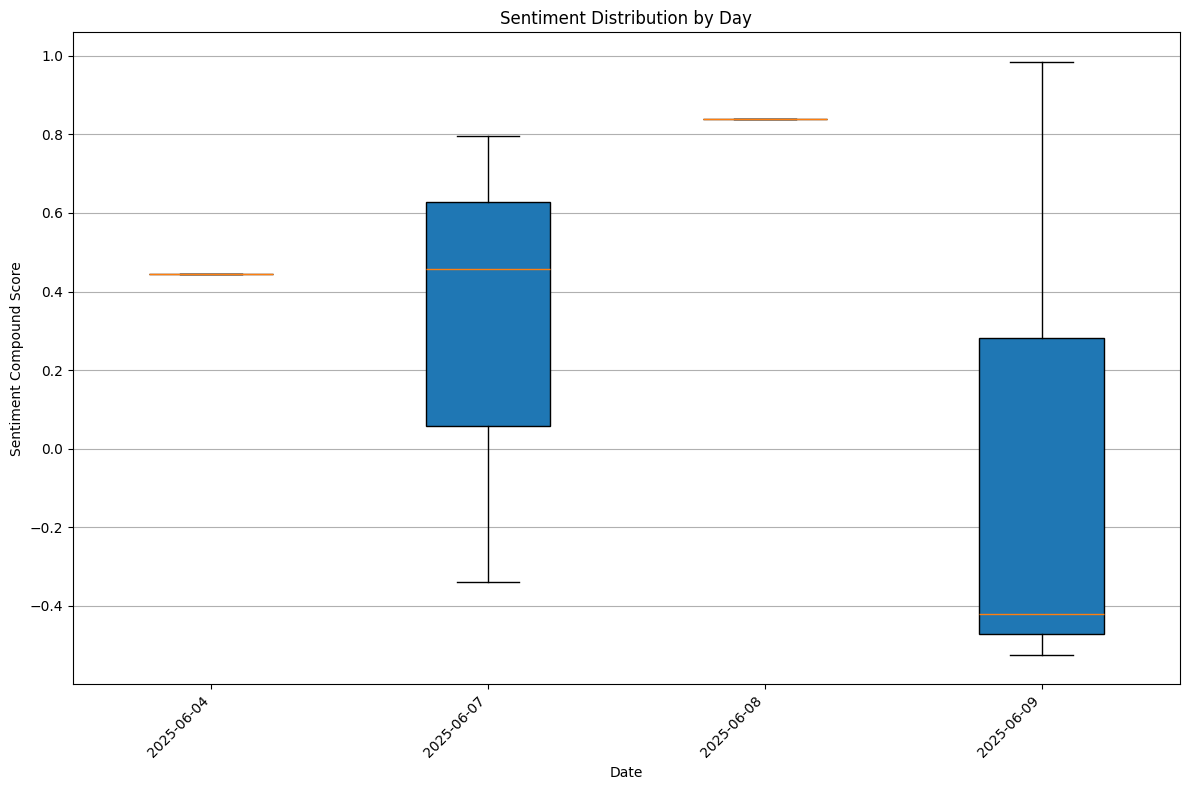

In [69]:
import matplotlib.pyplot as plt
import numpy as np # Import numpy
import pandas as pd # Ensure pandas is imported if you haven't already

# Make sure 'timestamp' is in datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the date
df['date'] = df['timestamp'].dt.date

# Group by date and get the sentiment scores for each day
sentiment_by_day = df.groupby('date')['sent_compound'].apply(list)

# Prepare data for boxplot
# Matplotlib's boxplot expects a list of arrays or lists, where each represents a group
boxplot_data = [np.array(scores) for scores in sentiment_by_day.values]

# Get dates as labels and format them
labels = [date.strftime('%Y-%m-%d') for date in sentiment_by_day.index]

plt.figure(figsize=(12, 8)) # Adjust figure size for multiple box plots
plt.boxplot(boxplot_data, labels=labels, patch_artist=True) # Use patch_artist for colored boxes
plt.xlabel('Date')
plt.ylabel('Sentiment Compound Score')
plt.title('Sentiment Distribution by Day')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(True, axis='y') # Add grid lines on the y-axis
plt.show()

## Project Ideas

Feel free to use this code to start your own project, and here are some (Chat-GPT generated 😬) ideas for projects:

* Real-Time Sentiment Pulse: Visualize sentiment trends over the past 24-48 hours for any keyword.

* One-Click News Brief: Generate a 3-sentence summary of today's top articles on a given topic.

* Bias/Slant Detector: Compare headlines from multiple outlets on the same event and label their bias.

* Event Timeline Generator: Autofill a chronological list of key dates and summaries for any query.

* Breaking News Alert Bot: Push a short alert whenever article volume spikes or sentiment turns extreme.

* Multilingual Hashtag Trend Mapper: Show related hashtags and translations across different languages.

* Rumor vs. Fact Checker: Verify a user-provided statement against recent reputable sources.

* “What's Changed?” Comparator: Highlight how coverage of a topic has shifted from last month to last week.

* Geo-Mood Map: Color-code countries by average sentiment or topic intensity on a query.

* Voice-Activated News Q&A: Let users speak a question and hear back a 2–3 sentence summary of current events.

## Dashboard libraries for Python

https://shiny.posit.co/py/

https://dash.plotly.com/

https://streamlit.io/

